# Task-6 Timeline Analysis_Covid-19

### Importing Needed Packages

In [1]:
pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

### Downloading the Data

In [3]:
!wget -O  owid-covid-data.csv https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

--2020-10-20 14:22:42--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11321759 (11M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  10.80M  20.6MB/s    in 0.5s    

2020-10-20 14:22:44 (20.6 MB/s) - ‘owid-covid-data.csv’ saved [11321759/11321759]



In [4]:
df = pd.read_csv("owid-covid-data.csv")

In [5]:
#Take a look at dataset

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
5,ABW,North America,Aruba,2020-03-23,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
6,ABW,North America,Aruba,2020-03-24,12.0,8.0,1.429,NaN,0.0,0.0,112.395,74.930,13.380,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
7,ABW,North America,Aruba,2020-03-25,17.0,5.0,2.143,NaN,0.0,0.0,159.227,46.831,20.071,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
8,ABW,North America,Aruba,2020-03-26,19.0,2.0,2.429,NaN,0.0,0.0,177.959,18.733,22.747,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
9,ABW,North America,Aruba,2020-03-27,28.0,9.0,3.429,NaN,0.0,0.0,262.256,84.296,32.113,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [6]:
#Take a look at dataset

df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
51384,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51385,NaN,NaN,International,2020-10-12,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51386,NaN,NaN,International,2020-10-13,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51387,NaN,NaN,International,2020-10-14,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51388,NaN,NaN,International,2020-10-15,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,International,2020-10-16,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,NaN,NaN,International,2020-10-17,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51391,NaN,NaN,International,2020-10-18,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51392,NaN,NaN,International,2020-10-19,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51393,NaN,NaN,International,2020-10-20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration

In [7]:
#Summarize the data

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.776400e+04,50491.000000,49704.000000,3.898000e+04,50491.000000,49704.000000,47505.000000,50427.000000,49639.000000,38736.000000,50427.000000,49639.000000,1.932800e+04,1.967900e+04,19679.000000,19328.000000,2.170400e+04,21704.000000,19997.000000,20335.000000,42748.000000,5.109900e+04,48739.000000,45786.000000,45101.000000,45548.000000,45183.000000,30137.000000,45766.000000,47417.000000,35730.000000,35273.000000,21547.000000,41284.000000,50448.000000,44175.000000
mean,1.329494e+05,1603.144323,1584.667526,6.054137e+03,44.335347,44.433810,2446.759870,29.061671,28.337590,84.253851,0.586546,0.583710,2.498627e+04,1.822427e+06,63.884158,0.802458,2.417559e+04,0.785796,191.968635,0.066792,56.979624,8.710317e+07,361.610925,31.260995,9.221162,5.829627,20776.611135,12.258984,251.922591,8.053385,10.780057,32.637157,52.300497,3.100584,73.984687,0.723675
std,1.331521e+06,14439.062869,14179.965367,4.900451e+04,370.496009,360.509934,4849.664589,103.418016,70.316223,168.475682,2.948014,1.868564,1.034436e+05,8.404629e+06,128.404475,1.508543,9.558351e+04,1.369417,916.893512,0.093082,26.817463,6.076292e+08,1650.058841,9.033895,6.307114,4.304584,20375.915132,19.315657,117.408280,4.153622,10.474303,13.434161,31.622788,2.520864,7.384698,0.153019
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,-3.743000e+03,1.000000e+00,0.000000,-0.398000,0.000000e+00,0.000000,1.324000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.410000e+02,0.000000,0.714000,1.100000e+01,0.000000,0.000000,70.179000,0.000000,0.194000,3.318000,0.000000,0.000000,1.000750e+03,5.244050e+04,3.225500,0.066000,1.081000e+03,0.068000,11.281000,0.009000,38.890000,1.399491e+06,37.728000,23.300000,3.552000,2.085000,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.666500e+03,12.000000,17.000000,7.000000e+01,0.000000,0.286000,465.734000,1.817000,3.360000,17.163500,0.000000,0.024000,3.446500e+03,2.238940e+05,16.486000,0.302000,3.828000e+03,0.316000,32.095000,0.030000,62.040000,8.278737e+06,88.125000,31.100000,6.981000,4.393000,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.665325e+04,190.000000,197.892750,6.060000e+02,3.000000,3.429000,2698.176000,20.949000,23.622000,69.314000,0.235000,0.336000,1.255825e+04,8.944525e+05,68.906500,0.927000,1.350000e+04,0.934000,104.201000,0.087000,78.700000,2.982597e+07,214.243000,39.700000,14.762000,9.473000,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.047250e+07,400350.000000,364659.143000,1.119283e+06,10468.000000,7459.143000,46890.571000,8652.658000,2472.188000,1237.551000,215.382000,63.140000,1.492409e+06,1.600000e+08,1509.435000,25.955000,1.169107e+06,19.092000,45864.000000,0.755000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51394 entries, 0 to 51393
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         51099 non-null  object 
 1   continent                        50804 non-null  object 
 2   location                         51394 non-null  object 
 3   date                             51394 non-null  object 
 4   total_cases                      47764 non-null  float64
 5   new_cases                        50491 non-null  float64
 6   new_cases_smoothed               49704 non-null  float64
 7   total_deaths                     38980 non-null  float64
 8   new_deaths                       50491 non-null  float64
 9   new_deaths_smoothed              49704 non-null  float64
 10  total_cases_per_million          47505 non-null  float64
 11  new_cases_per_million            50427 non-null  float64
 12  new_cases_smoothed

### droping the Duplicates rows

In [9]:
df.shape

(51394, 41)

In [10]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 41)


In [11]:
df.count() #Used to count the number of rows

iso_code                           51099
continent                          50804
location                           51394
date                               51394
total_cases                        47764
new_cases                          50491
new_cases_smoothed                 49704
total_deaths                       38980
new_deaths                         50491
new_deaths_smoothed                49704
total_cases_per_million            47505
new_cases_per_million              50427
new_cases_smoothed_per_million     49639
total_deaths_per_million           38736
new_deaths_per_million             50427
new_deaths_smoothed_per_million    49639
new_tests                          19328
total_tests                        19679
total_tests_per_thousand           19679
new_tests_per_thousand             19328
new_tests_smoothed                 21704
new_tests_smoothed_per_thousand    21704
tests_per_case                     19997
positive_rate                      20335
tests_units     

In [12]:
#df = df.drop_duplicates()

#df.head()

In [13]:
#df.count()

### Checking the Missing or Null values

In [14]:
print(df.isnull().sum())

iso_code                             295
continent                            590
location                               0
date                                   0
total_cases                         3630
new_cases                            903
new_cases_smoothed                  1690
total_deaths                       12414
new_deaths                           903
new_deaths_smoothed                 1690
total_cases_per_million             3889
new_cases_per_million                967
new_cases_smoothed_per_million      1755
total_deaths_per_million           12658
new_deaths_per_million               967
new_deaths_smoothed_per_million     1755
new_tests                          32066
total_tests                        31715
total_tests_per_thousand           31715
new_tests_per_thousand             32066
new_tests_smoothed                 29690
new_tests_smoothed_per_thousand    29690
tests_per_case                     31397
positive_rate                      31059
tests_units     

In [15]:
#If you finds missing values in your data then remove it's by using following steps

#df = df.dropna() #Droping the missing values

#df.count()

In [16]:
#print(df.isnull().sum()) #After dropping the values

In [17]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]

df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-03-13,2.0,2.0,NaN,NaN,NaN
1,2020-03-19,NaN,NaN,NaN,NaN,NaN
2,2020-03-20,4.0,2.0,NaN,NaN,NaN
3,2020-03-21,NaN,NaN,NaN,NaN,NaN
4,2020-03-22,NaN,NaN,NaN,NaN,NaN


In [18]:
df1.date = pd.to_datetime(df.date)

df1.set_index('date', inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df1.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-03-13,2.0,2.0,NaN,NaN,NaN
2020-03-19,NaN,NaN,NaN,NaN,NaN
2020-03-20,4.0,2.0,NaN,NaN,NaN
2020-03-21,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN


In [20]:
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-10-16,696.0,NaN,7.0,NaN,NaN
2020-10-17,696.0,NaN,7.0,NaN,NaN
2020-10-18,696.0,NaN,7.0,NaN,NaN
2020-10-19,696.0,NaN,7.0,NaN,NaN
2020-10-20,696.0,NaN,7.0,NaN,NaN


Text(0.5, 0, 'Month')

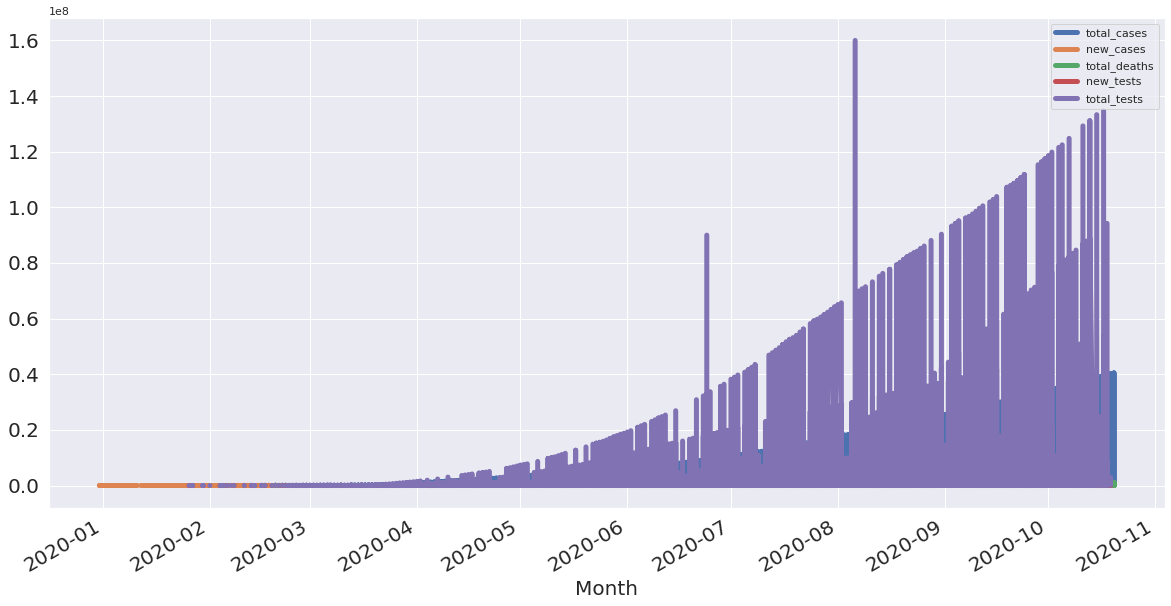

In [21]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

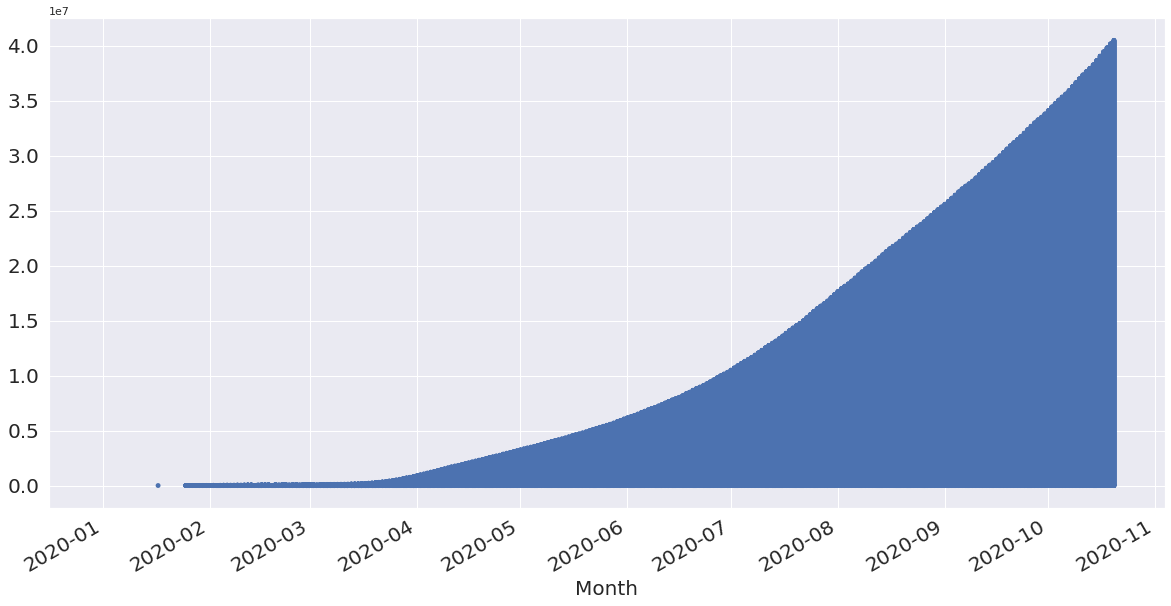

In [22]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

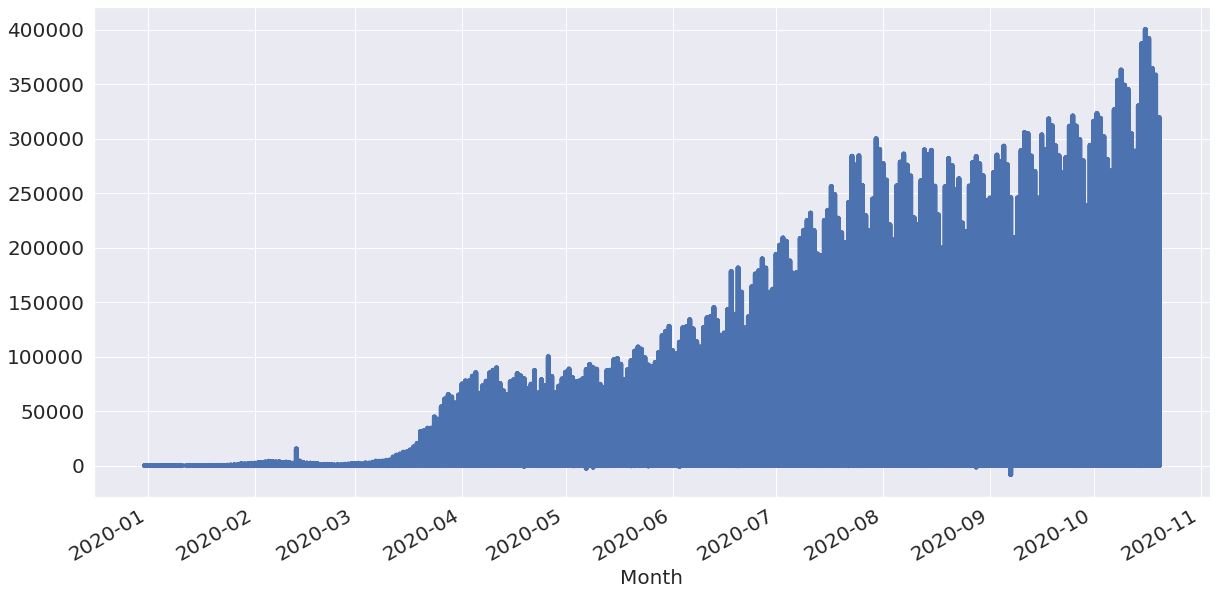

In [23]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

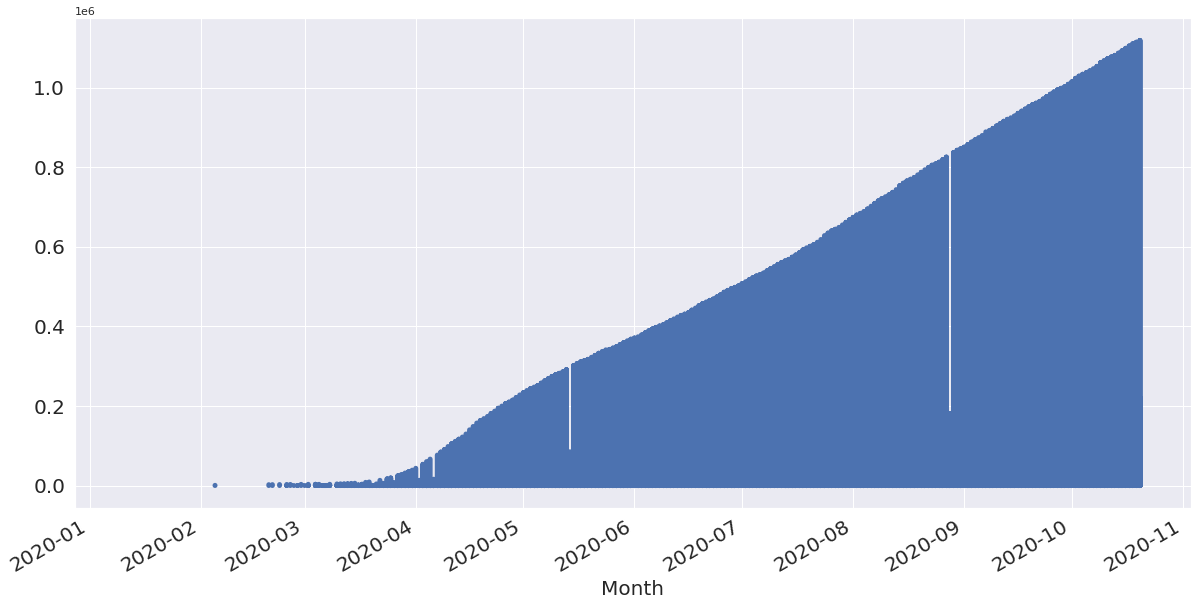

In [24]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

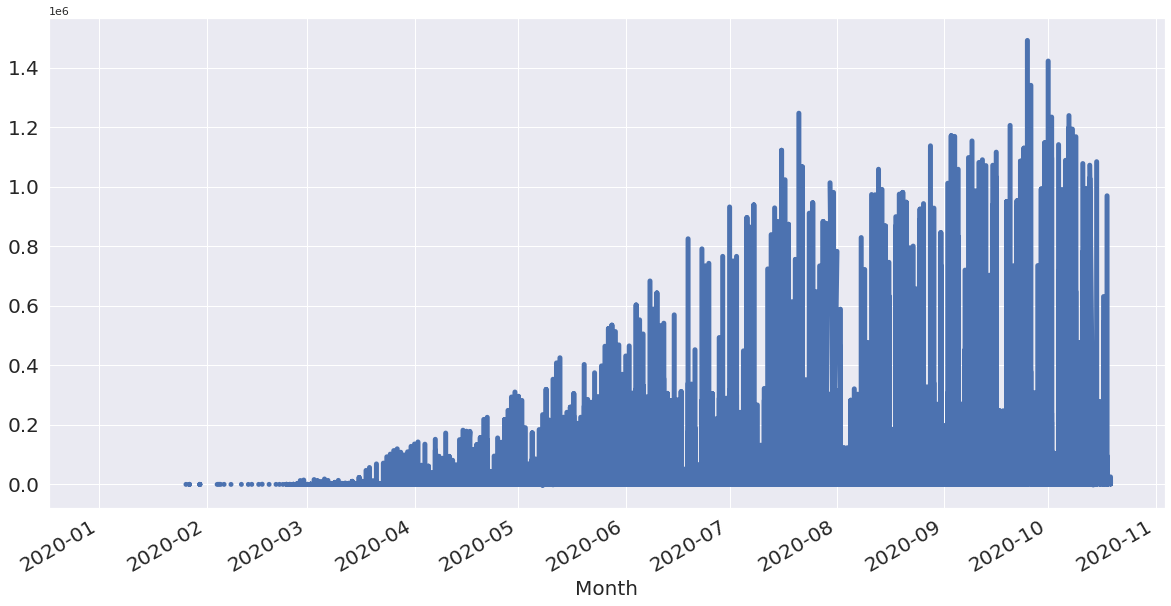

In [25]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

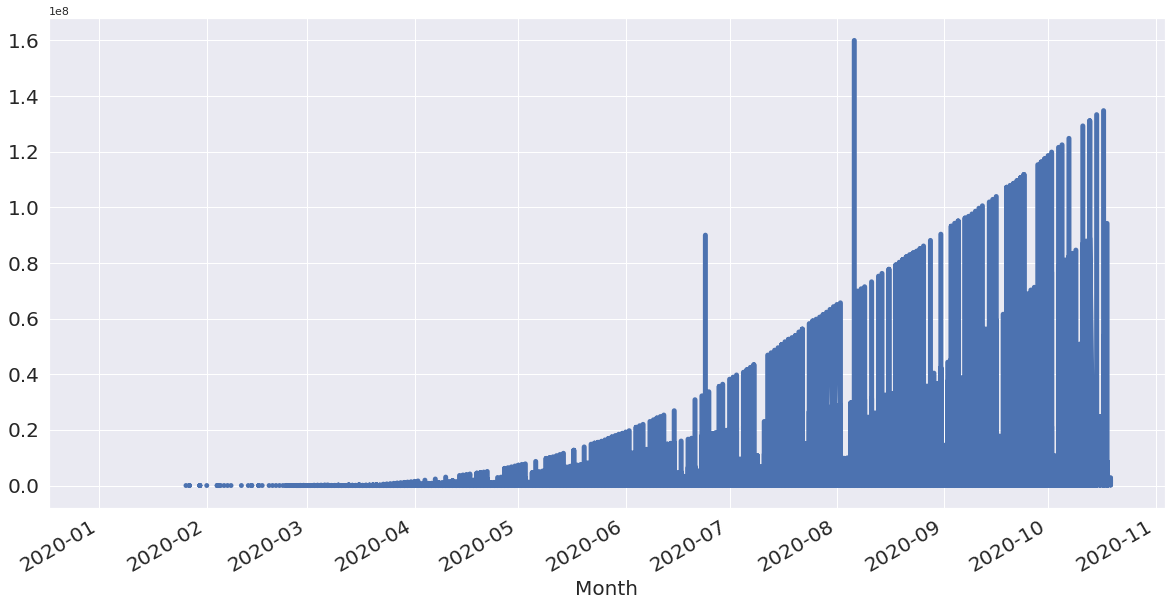

In [26]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

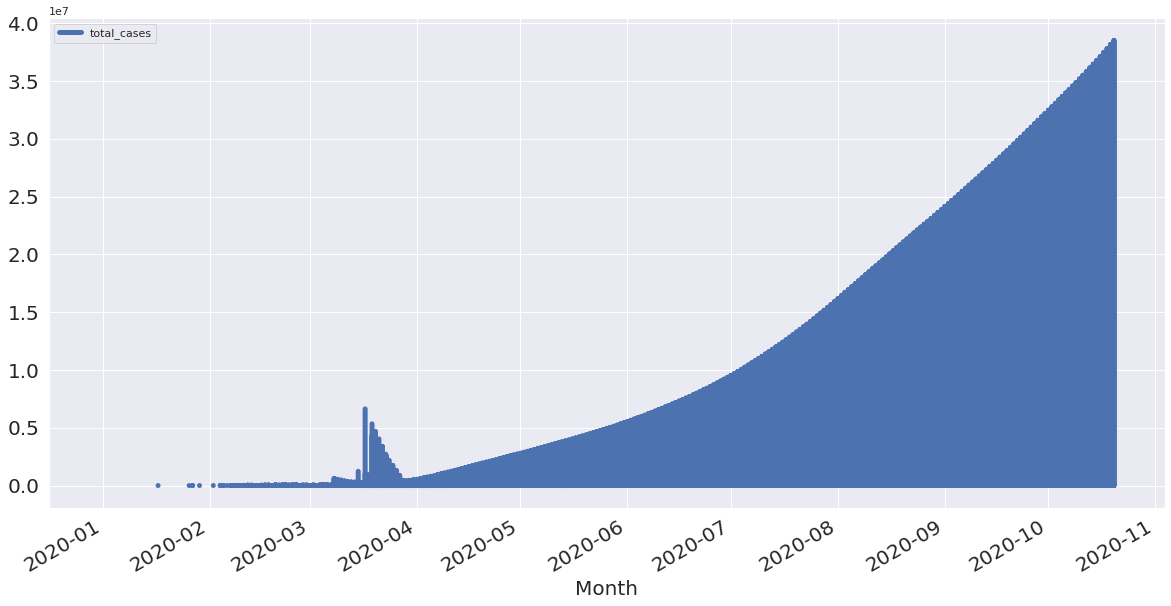

In [27]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

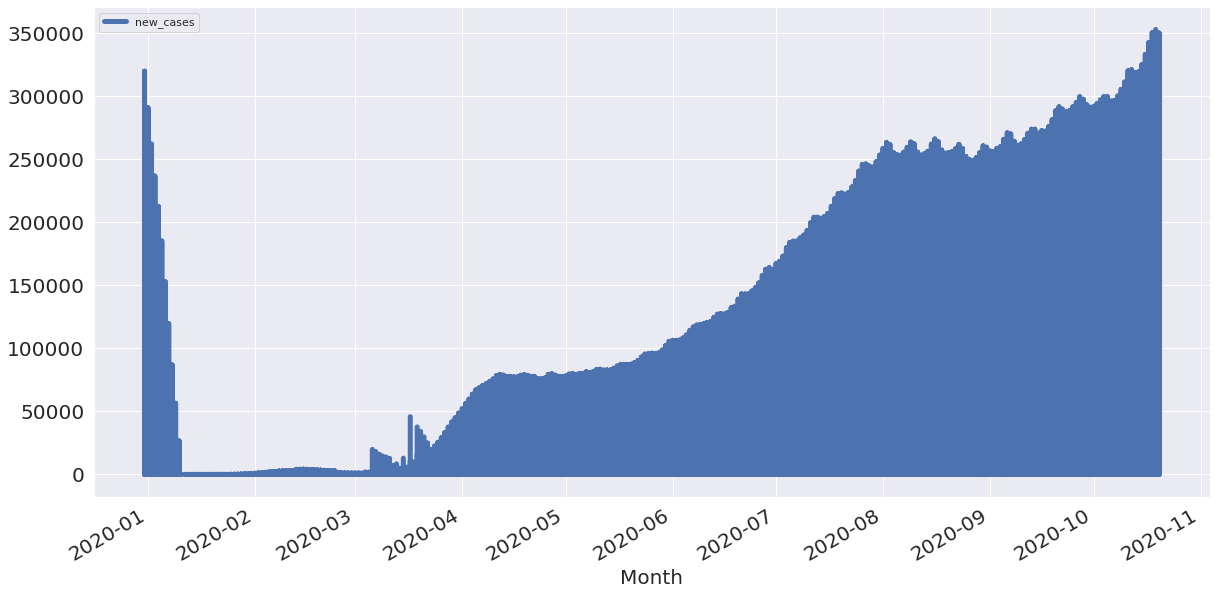

In [28]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

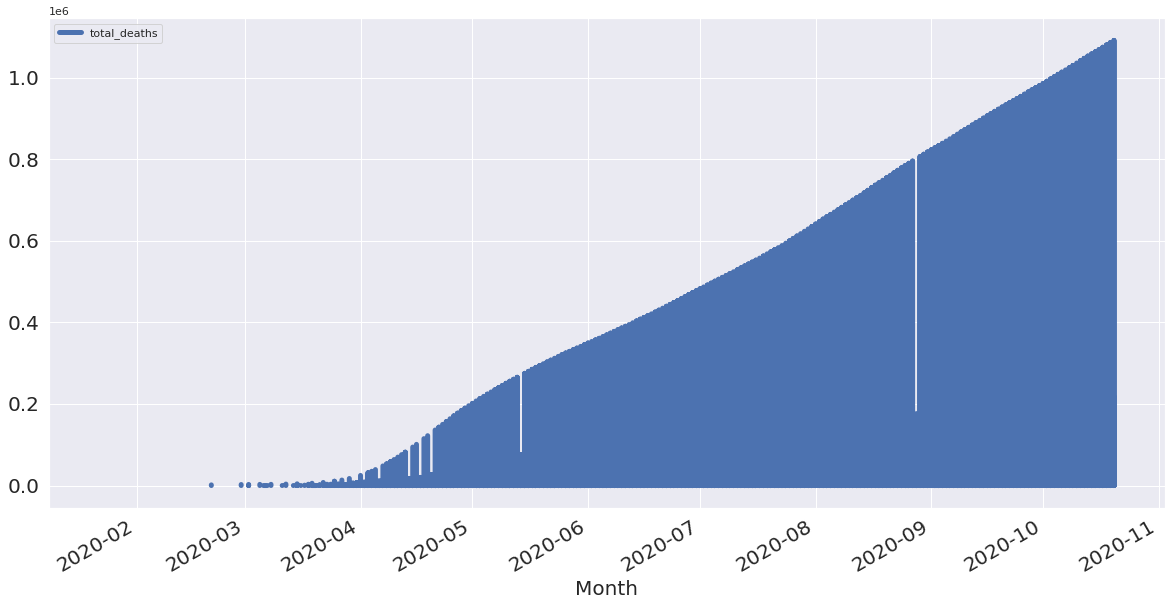

In [29]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

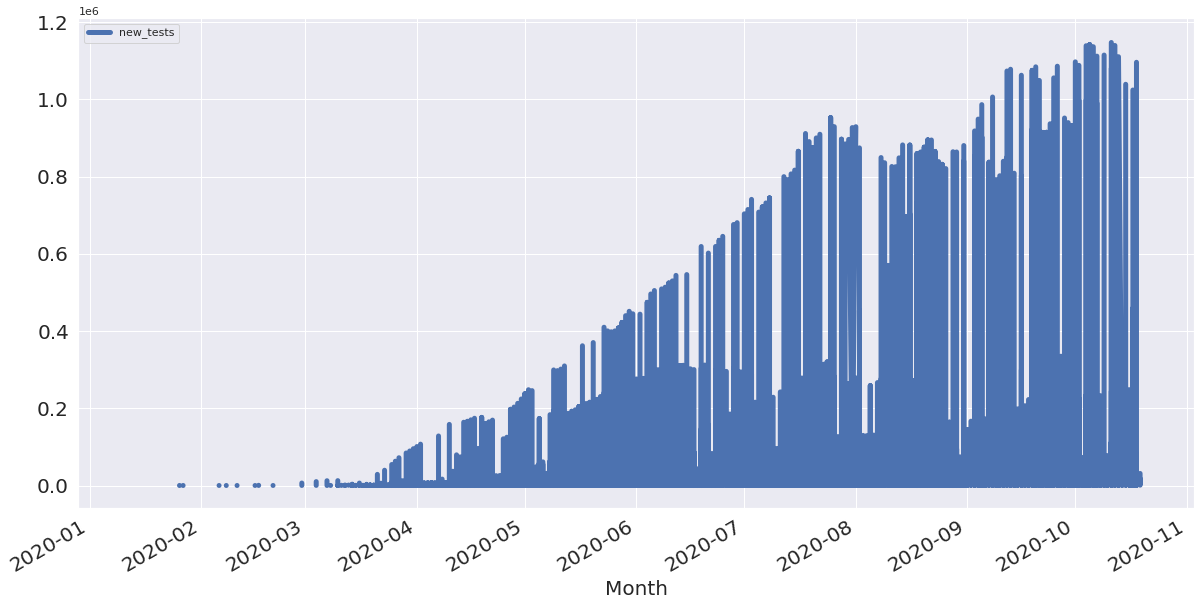

In [30]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

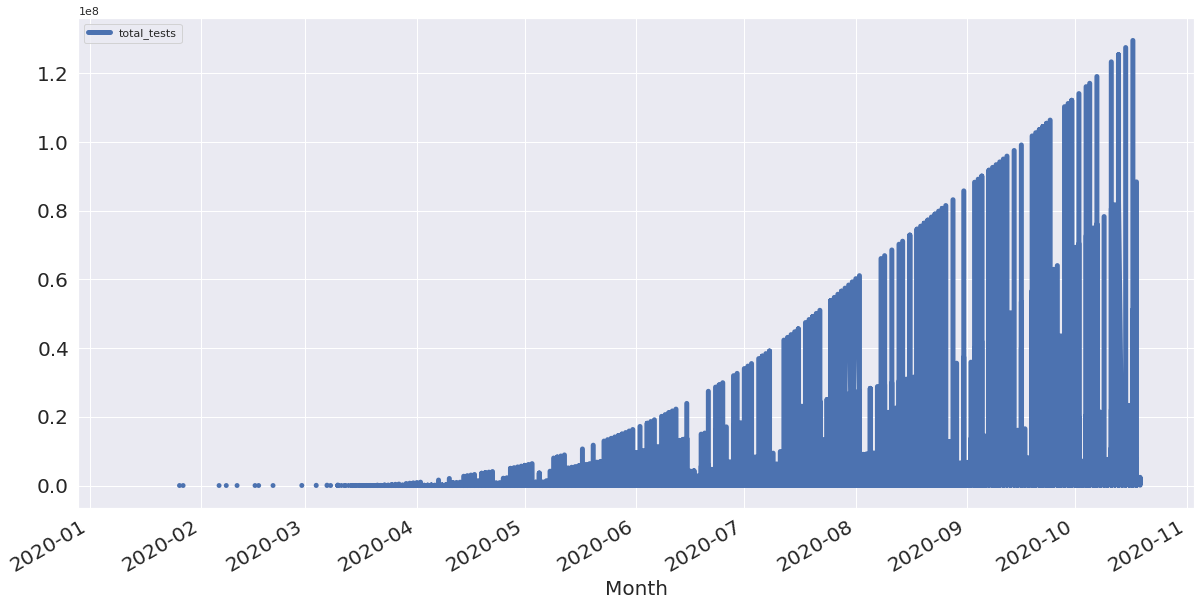

In [31]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

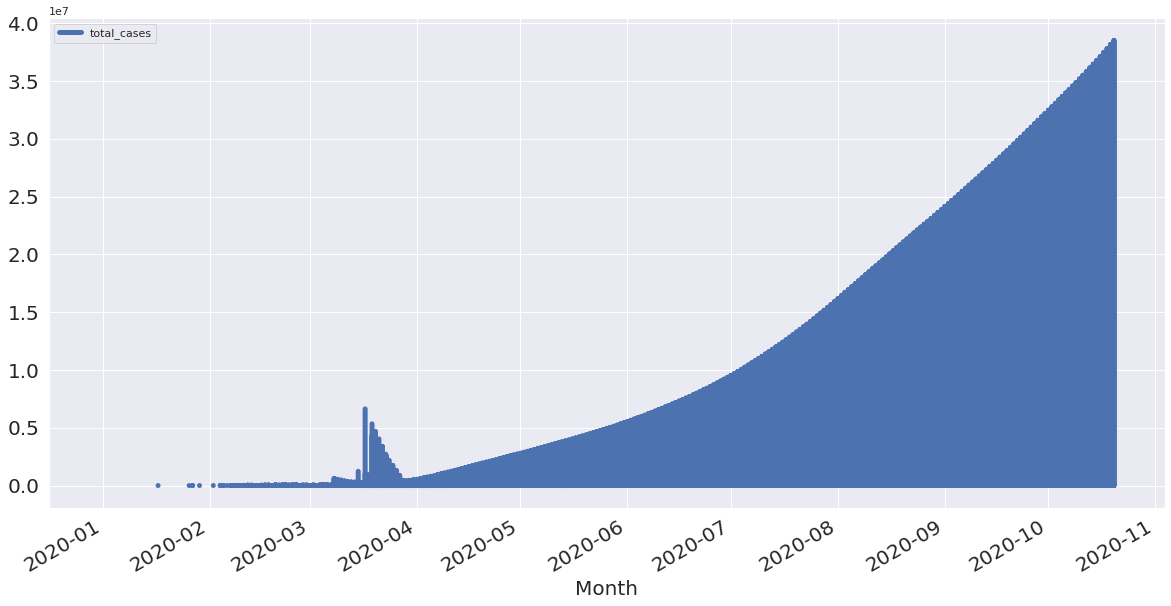

In [32]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

### Seasonal Patterns in Time Series Data

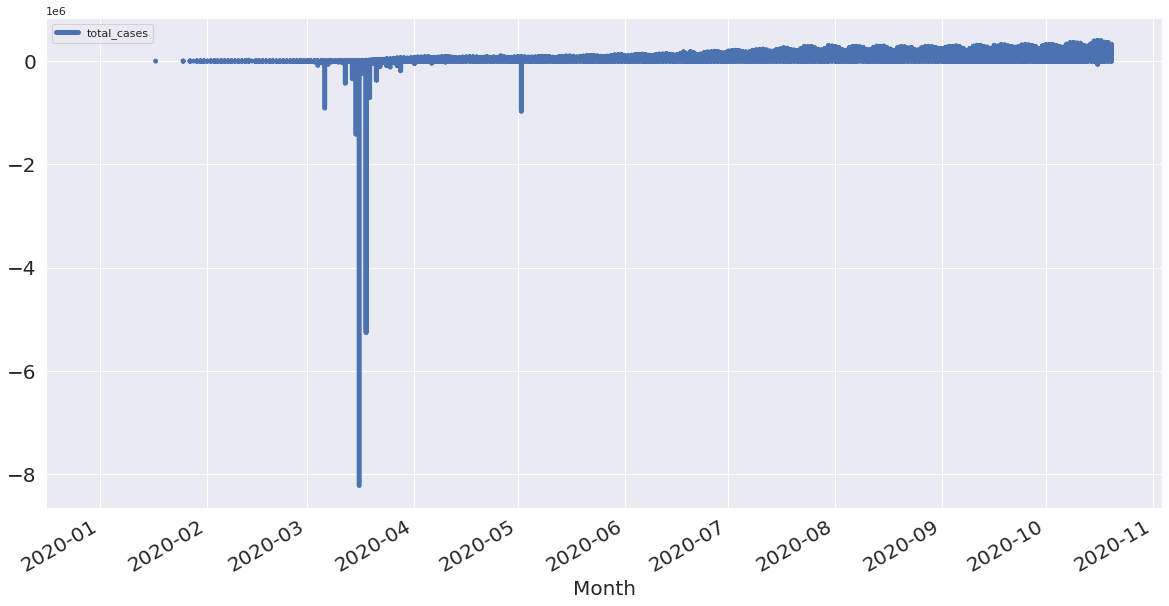

In [34]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);